In [1]:
import os
os.path

<module 'ntpath' from 'C:\\Users\\civil\\miniconda38\\lib\\ntpath.py'>

## OpenCC：繁體簡體轉換

In [2]:
!pip install opencc-python-reimplemented

In [3]:
from opencc import OpenCC

In [4]:
cc = OpenCC('t2s')
text = '自然語言認知和理解是讓電腦把輸入的語言變成有意思的符號和關係，然後根據目的再處理。自然語言生成系統則是把計算機數據轉化為自然語言。'
print(cc.convert(text))

自然语言认知和理解是让电脑把输入的语言变成有意思的符号和关系，然后根据目的再处理。自然语言生成系统则是把计算机数据转化为自然语言。


In [5]:
cc = OpenCC('s2t')
text = '自然语言认知和理解是让电脑把输入的语言变成有意思的符号和关系，然后根据目的再处理。自然语言生成系统则是把计算机数据转化为自然语言。'
print(cc.convert(text))

自然語言認知和理解是讓電腦把輸入的語言變成有意思的符號和關係，然後根據目的再處理。自然語言生成系統則是把計算機數據轉化爲自然語言。


In [6]:
text = '滑鼠在螢幕上移動'
cc = OpenCC('t2s')
print('一般轉換：{}'.format(cc.convert(text)))
cc = OpenCC('tw2sp')
print('慣用語轉換：{}'.format(cc.convert(text)))

一般轉換：滑鼠在荧幕上移动
慣用語轉換：鼠标在屏幕上移动


In [7]:
text = '鼠标在屏幕上移动'
cc = OpenCC('s2t')
print('一般轉換：{}'.format(cc.convert(text)))
cc = OpenCC('s2twp')
print('片語轉換：{}'.format(cc.convert(text)))

一般轉換：鼠標在屏幕上移動
片語轉換：滑鼠在螢幕上移動


## lotecc：繁簡批次檔案轉換

In [8]:
!pip install lotecc

In [9]:
from lotecc import lote_chinese_conversion as lotecc

In [10]:
converted = lotecc(conversion='tw2sp',
                   input='tradition1.txt',
                   output='tradition1.txt',
                   in_enc='utf-8',
                   out_enc='utf-8',
                   suffix='_t')
print(converted)

[('D:\\GoogleDrive219\\_EBOOKS\\__PYTHON\\Python實戰聖經\\本書範例\\ch09\\tradition1.txt', 'D:\\GoogleDrive219\\_EBOOKS\\__PYTHON\\Python實戰聖經\\本書範例\\ch09\\tradition1_t.txt')]


In [11]:
converted = lotecc(conversion='s2twp',
                   input='simple',
                   output='simple',
                   in_enc='utf-8',
                   out_enc='utf-8',
                   suffix='_t')
# print(converted)
for source, output in converted:
  print(f'原始檔案 <{source}> 轉換為 <{output}>')

原始檔案 <D:\GoogleDrive219\_EBOOKS\__PYTHON\Python實戰聖經\本書範例\ch09\simple\simple1.txt> 轉換為 <D:\GoogleDrive219\_EBOOKS\__PYTHON\Python實戰聖經\本書範例\ch09\simple\simple1_t.txt>
原始檔案 <D:\GoogleDrive219\_EBOOKS\__PYTHON\Python實戰聖經\本書範例\ch09\simple\simple1_t.txt> 轉換為 <D:\GoogleDrive219\_EBOOKS\__PYTHON\Python實戰聖經\本書範例\ch09\simple\simple1_t_t.txt>
原始檔案 <D:\GoogleDrive219\_EBOOKS\__PYTHON\Python實戰聖經\本書範例\ch09\simple\simple2.txt> 轉換為 <D:\GoogleDrive219\_EBOOKS\__PYTHON\Python實戰聖經\本書範例\ch09\simple\simple2_t.txt>
原始檔案 <D:\GoogleDrive219\_EBOOKS\__PYTHON\Python實戰聖經\本書範例\ch09\simple\simple2_t.txt> 轉換為 <D:\GoogleDrive219\_EBOOKS\__PYTHON\Python實戰聖經\本書範例\ch09\simple\simple2_t_t.txt>
原始檔案 <D:\GoogleDrive219\_EBOOKS\__PYTHON\Python實戰聖經\本書範例\ch09\simple\simple3.txt> 轉換為 <D:\GoogleDrive219\_EBOOKS\__PYTHON\Python實戰聖經\本書範例\ch09\simple\simple3_t.txt>


## jieba：最常用中文分詞工具

In [12]:
import jieba

In [13]:
sentence = '我今天要到台北松山機場出差！'
breakword = jieba.cut(sentence, cut_all=False)
print('精確模式：' + '|'.join(breakword))

breakword = jieba.cut(sentence, cut_all=True)
print('全文模式：' + '|'.join(breakword))

breakword = jieba.cut_for_search(sentence)
print('搜索引擎模式：' + '|'.join(breakword))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\civil\AppData\Local\Temp\jieba.cache
Loading model cost 0.472 seconds.
Prefix dict has been built successfully.


精確模式：我|今天|要|到|台北|松山|機場|出差|！
全文模式：我|今天|要到|台北|松山|機|場|出差|！
搜索引擎模式：我|今天|要|到|台北|松山|機場|出差|！


In [14]:
!wget - O dict.txt.big.txt https: // raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
jieba.set_dictionary('dict.txt.big.txt')
sentence = '我今天要到台北松山機場出差！'
breakword = jieba.cut(sentence, cut_all=False)
print('|'.join(breakword))

Building prefix dict from D:\GoogleDrive219\_EBOOKS\__PYTHON\Python實戰聖經\本書範例\ch09\dict.txt.big.txt ...
Loading model from cache C:\Users\civil\AppData\Local\Temp\jieba.u858d9e1d8647afb2ad8f15a74b73949a.cache
Loading model cost 0.822 seconds.
Prefix dict has been built successfully.


我|今天|要|到|台北|松山機場|出差|！


In [16]:
jieba.set_dictionary('dict.txt.big.txt')
sentence = '這部電影很好看，是我的朋友陳國文主演的。'
breakword = jieba.cut(sentence, cut_all=False)
print('|'.join(breakword))

Building prefix dict from D:\GoogleDrive219\_EBOOKS\__PYTHON\Python實戰聖經\本書範例\ch09\dict.txt.big.txt ...
Loading model from cache C:\Users\civil\AppData\Local\Temp\jieba.u858d9e1d8647afb2ad8f15a74b73949a.cache
Loading model cost 0.819 seconds.
Prefix dict has been built successfully.


這部|電影|很|好看|，|是|我|的|朋友|陳|國文|主演|的|。


In [17]:
jieba.set_dictionary('dict.txt.big.txt')
jieba.load_userdict('user_dict_test.txt')
sentence = '這部電影很好看，是我的朋友陳國文主演的。'
breakword = jieba.cut(sentence, cut_all=False)
print('|'.join(breakword))

Building prefix dict from D:\GoogleDrive219\_EBOOKS\__PYTHON\Python實戰聖經\本書範例\ch09\dict.txt.big.txt ...
Loading model from cache C:\Users\civil\AppData\Local\Temp\jieba.u858d9e1d8647afb2ad8f15a74b73949a.cache
Loading model cost 0.827 seconds.
Prefix dict has been built successfully.


這部|電影|很|好看|，|是|我|的|朋友|陳國文|主演|的|。


In [18]:
jieba.set_dictionary('dict.txt.big.txt')
jieba.load_userdict('user_dict_test.txt')
with open('stopWord_test.txt', 'r', encoding='utf-8-sig') as f:
  stops = f.read().split('\n')
sentence = '這部電影很好看，是我的朋友陳國文主演的。'
breakword = jieba.cut(sentence, cut_all=False)
words = []
for word in breakword:
  if word not in stops:
    words.append(word)
print('|'.join(words))

Building prefix dict from D:\GoogleDrive219\_EBOOKS\__PYTHON\Python實戰聖經\本書範例\ch09\dict.txt.big.txt ...
Loading model from cache C:\Users\civil\AppData\Local\Temp\jieba.u858d9e1d8647afb2ad8f15a74b73949a.cache
Loading model cost 0.827 seconds.
Prefix dict has been built successfully.


這部|電影|很|好看|是|我|的|朋友|陳國文|主演|的


## pywordseg：繁體中文斷詞

In [19]:
!pip install pywordseg

  Using cached pywordseg-0.1.4-py3-none-any.whl (10 kB)
  Using cached overrides-1.9.tar.gz (3.4 kB)
  Created wheel for overrides: filename=overrides-1.9-py3-none-any.whl size=4209 sha256=368b9822a5b10fc0e8d86408aa311a519eddf891bac8ec10bd418e133cc4258d
  Stored in directory: c:\users\civil\appdata\local\pip\cache\wheels\4a\e4\bd\f1d698d00b4047d73fdbb4ac30b8e489a51527282d913bba5f
Successfully built overrides


In [20]:
from pywordseg import *

Using pywordseg for the first time, download CharEmb model.
Download models ...80%, 23 MB, 10562 KB/s, 2 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Download models ...11%, 23 MB, 12903 KB/s, 1 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Download models ...29%, 63 MB, 15946 KB/s, 4 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Download models ...48%, 104 MB, 16851 KB/s, 6 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Download models ...67%, 143 MB, 17317 KB/s, 8 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Download models ...93%, 198 MB, 17559 KB/s, 11 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Download models ...7%, 26 MB, 11925 KB/s, 2 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Download models ...19%, 66 MB, 13374 KB/s, 5 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Download models ...31%, 106 MB, 13849 KB/s, 7 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Download models ...43%, 146 MB, 14095 KB/s, 10 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Download models ...55%, 187 MB, 14213 KB/s, 13 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Download models ...67%, 227 MB, 13477 KB/s, 17 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Download models ...79%, 267 MB, 13523 KB/s, 20 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Download models ...91%, 307 MB, 13670 KB/s, 23 seconds passed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Download models ...100%, 336 MB, 13796 KB/s, 25 seconds passed
ELMoForManyLangs built!


In [21]:
seg = Wordseg(batch_size=64, device="cuda:0",
              embedding='elmo', elmo_use_cuda=True, mode="TW")
words = seg.cut(["這部電影很好看，是我的朋友陳國文主演的。"])
print('|'.join(words[0]))

這|部|電影|很|好看|,|是|我|的|朋友|陳國文|主演|的|。


In [22]:
seg = Wordseg(batch_size=64, embedding='elmo', elmo_use_cuda=False, mode="TW")
words = seg.cut(["今天天氣真好啊!", "路遙知馬力，日久見人心。"])
for i in range(len(words)):
  print('{}. {}'.format(i, '|'.join(words[i])))

0. 今天|天氣|真|好|啊|!
1. 路|遙知|馬力|,|日久|見|人心|。


In [23]:
seg = Wordseg(batch_size=64, embedding='elmo', elmo_use_cuda=False, mode="TW")
words = seg.cut(["這部電影很好看，是我的朋友陳國文主演的。"])
with open('stopWord_test.txt', 'r', encoding='utf-8-sig') as f:
  stops = f.read().split('\n')
stopwords = []
for word in words[0]:
  if word not in stops:
    stopwords.append(word)
print('|'.join(stopwords))

這|部|電影|很|好看|是|我|的|朋友|陳國文|主演|的


## sumy：對網頁或文章進行摘要

In [24]:
!pip install sumy

  Using cached sumy-0.10.0-py2.py3-none-any.whl (94 kB)
  Using cached docopt-0.6.2.tar.gz (25 kB)
  Using cached pycountry-22.3.5.tar.gz (10.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached breadability-0.1.20.tar.gz (32 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21713 sha256=e21ae7a0f5698437cffb271b0ee5ae78a27519533fa3ab2b7a537f6ab620985a
  Stored in directory: c:\users\civil\appdata\local\pip\cache\wheels\5f\0d\0c\2062d8c1758b4b1a2e42b4a63e6660d9ec2ba9463cfee9eeab
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=ec2e684c4b501b8e1acd26ed3c6029824423f036e155b7

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\civil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

In [27]:
LANGUAGE = "chinese"
# LANGUAGE = "english"
SENTENCES_COUNT = 5
# SENTENCES_COUNT = 10
url = "https://news.ltn.com.tw/news/life/breakingnews/3649202"
# url = "https://en.wikipedia.org/wiki/Automatic_summarization"
parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
summarizer = Summarizer(Stemmer(LANGUAGE))
summarizer.stop_words = get_stop_words(LANGUAGE)
sumies = summarizer(parser.document, SENTENCES_COUNT)
for i, sentence in enumerate(sumies):
  print('{}. {}'.format(i+1, sentence))

1. 仁德區保華宮將中元普度結合愛心公益，捐助弱勢。
2. 2021/08/24 20:07〔記者吳俊鋒／台南報導〕台南仁德區的保華宮，結合中元普度，與社會大眾聯手募集愛心供品，包含1800斤的白米，以及各式生活物資，祭拜後，今天一併發放給低收入戶，照顧弱勢，讓民間傳統習俗也兼具慈善公益的意義。
3. 保華宮主委黃翠雲指出，農曆7月也是慈悲月，今年適逢防疫警戒，呼籲信眾以代購普品的方式，做好中元祭拜，並降低群聚風險，還號召活動之後捐助給有需要幫助的⼈，廟方抱持感恩的心，善盡社會責任，獲得熱烈迴響。
4. 仁德區公所轄內列冊的低收入家庭有237戶，保華宮準備豐盛的供品，宴請四方好兄弟，並將募集的愛心米，連同麵食、罐頭、油品等物資一起捐助弱勢，今天在廟內發放。
5. 該廟還提供了環保袋，將救濟物資裝好，讓低收入戶方便領取，市議員吳禹寰也到場協助發放，並呼籲社會各界，疫情期間，弱勢生活大不易，需要更多關懷。


In [28]:
LANGUAGE = "chinese"
SENTENCES_COUNT = 5
parser = PlaintextParser.from_file("article1.txt", Tokenizer(LANGUAGE))
summarizer = Summarizer(Stemmer(LANGUAGE))
summarizer.stop_words = get_stop_words(LANGUAGE)
sumies = summarizer(parser.document, SENTENCES_COUNT)
for i, sentence in enumerate(sumies):
  print('{}. {}'.format(i+1, sentence))

1. 直到有一天，老公公被証實患上癌症，現在，他除了要克服生活的不便外，還要接受物理治療和疾病帶來的痛楚。
2. 』 可能疾病初期帶來的痛楚不大，但到後期，一個體弱的老人家還熬得下去嗎？
3. 』 老婆婆微笑回答：『一個大男人，要妻子每天清理大小二便的，還在逞強呢！
4. 護士很詫異，她衝口而出地對老公公說： 『我們都以為你是因為不捨得老婆婆才那麼堅強地活下去呢！
5. 』 老公公又接著說：『這妮子呀，我從和她結婚那天起便對自己許諾，一輩子都不讓她哭泣的，大約她不知道吧，那次她看見我在床上捲曲，哭了起來，那時我的痛苦，比病魔對我的折磨還要難受......，白頭到老嘛，我們做到了，遺憾的是，我始終令她為我哭過一次......。


## wordcloud：文字雲

Building prefix dict from D:\GoogleDrive219\_EBOOKS\__PYTHON\Python實戰聖經\本書範例\ch09\dict.txt.big.txt ...
2022-05-25 15:55:00,371 DEBUG: Building prefix dict from D:\GoogleDrive219\_EBOOKS\__PYTHON\Python實戰聖經\本書範例\ch09\dict.txt.big.txt ...
Loading model from cache C:\Users\civil\AppData\Local\Temp\jieba.u858d9e1d8647afb2ad8f15a74b73949a.cache
2022-05-25 15:55:00,373 DEBUG: Loading model from cache C:\Users\civil\AppData\Local\Temp\jieba.u858d9e1d8647afb2ad8f15a74b73949a.cache
Loading model cost 0.878 seconds.
2022-05-25 15:55:01,251 DEBUG: Loading model cost 0.878 seconds.
Prefix dict has been built successfully.
2022-05-25 15:55:01,252 DEBUG: Prefix dict has been built successfully.


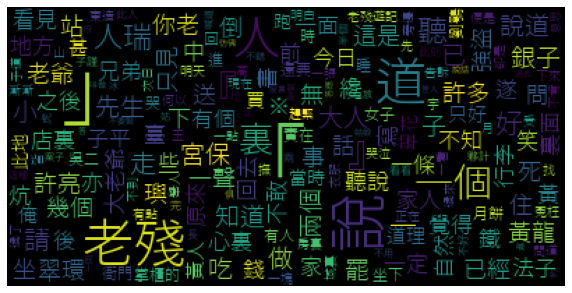

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from collections import Counter
from PIL import Image
import numpy as np
import requests
text = open('travel.txt', "r", encoding="utf-8").read()
jieba.set_dictionary('dict.txt.big.txt')
with open('stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:
  # with open('stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:
  stops = f.read().split('\n')
terms = []
for t in jieba.cut(text, cut_all=False):
  if t not in stops:
    terms.append(t)
diction = Counter(terms)
fontfile = requests.get(
  "https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download")
with open('taipei_sans_tc_beta.ttf', 'wb') as f:
  f.write(fontfile.content)
wordcloud = WordCloud(font_path='taipei_sans_tc_beta.ttf')
#mask = np.array(Image.open("heart.png"))
#wordcloud = WordCloud(background_color="white",mask=mask,font_path='taipei_sans_tc_beta.ttf')
wordcloud.generate_from_frequencies(frequencies=diction)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("bookCloud.png")